In [1]:
import utils as u

import os
import pickle
import json

import time

import numpy as np

import matplotlib.pyplot as plt

import mne

import pycrostates as pcs

C:\Users\enriq\anaconda1\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,




Processing file: H:\CSIC\Microstates\m3_2500.pickle
Number of clusters in computation: 3


Method,ModKMeans
Fit,100 initializations on 639 samples
Cluster centers,3
GEV,73.37 %
Cluster centers names,"AB, C, D"
Channels,61 EEG


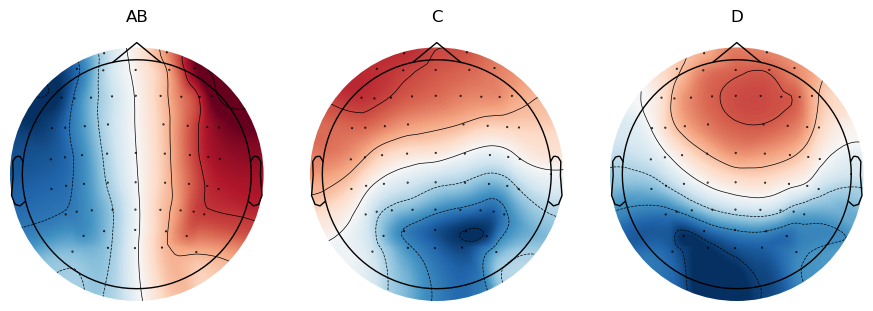



Processing file: H:\CSIC\Microstates\m4_2500.pickle
Number of clusters in computation: 4


Method,ModKMeans
Fit,100 initializations on 852 samples
Cluster centers,4
GEV,73.18 %
Cluster centers names,"A, B, C, D"
Channels,61 EEG


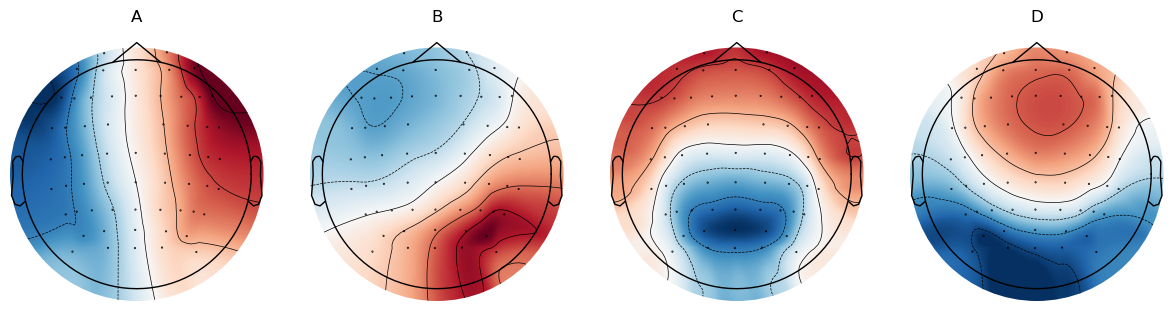



Processing file: H:\CSIC\Microstates\m5_2500.pickle
Number of clusters in computation: 5


Method,ModKMeans
Fit,100 initializations on 1065 samples
Cluster centers,5
GEV,73.10 %
Cluster centers names,"A, B, C, D, E"
Channels,61 EEG


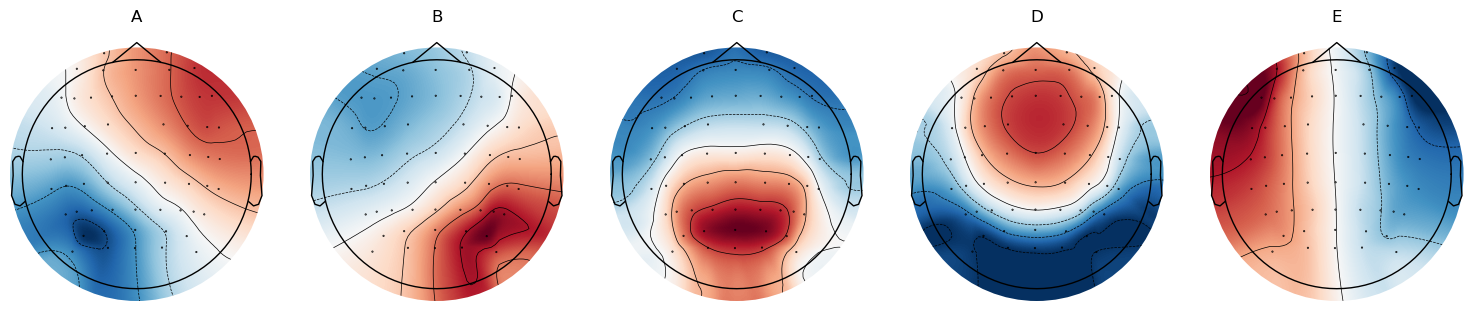



Processing file: H:\CSIC\Microstates\m6_2500.pickle
Number of clusters in computation: 6


Method,ModKMeans
Fit,100 initializations on 1278 samples
Cluster centers,6
GEV,74.45 %
Cluster centers names,"A, B, C, D, E, F"
Channels,61 EEG


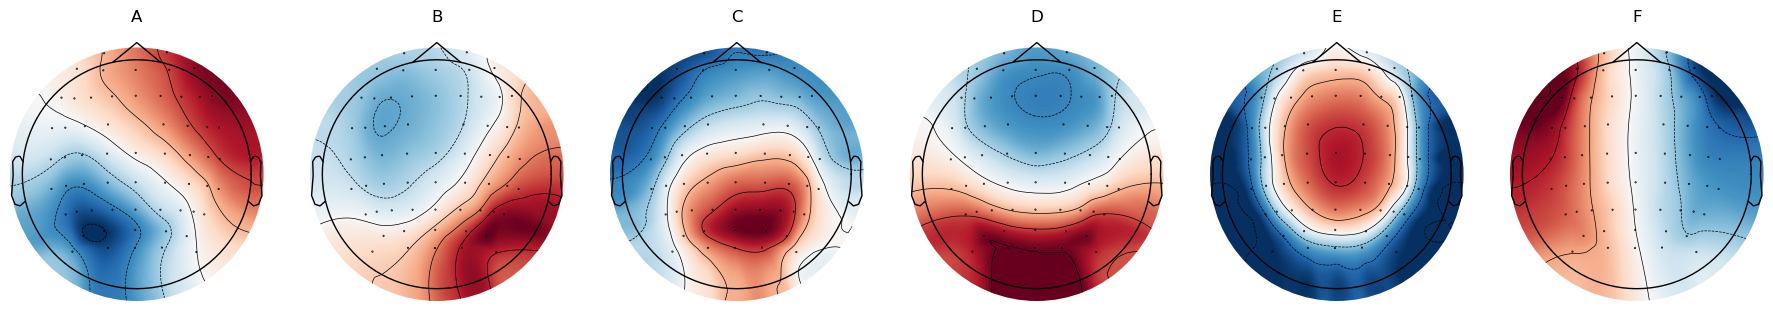



Processing file: H:\CSIC\Microstates\m7_2500.pickle
Number of clusters in computation: 7


Method,ModKMeans
Fit,100 initializations on 1491 samples
Cluster centers,7
GEV,74.24 %
Cluster centers names,"A, B, C, D, E, F, G"
Channels,61 EEG


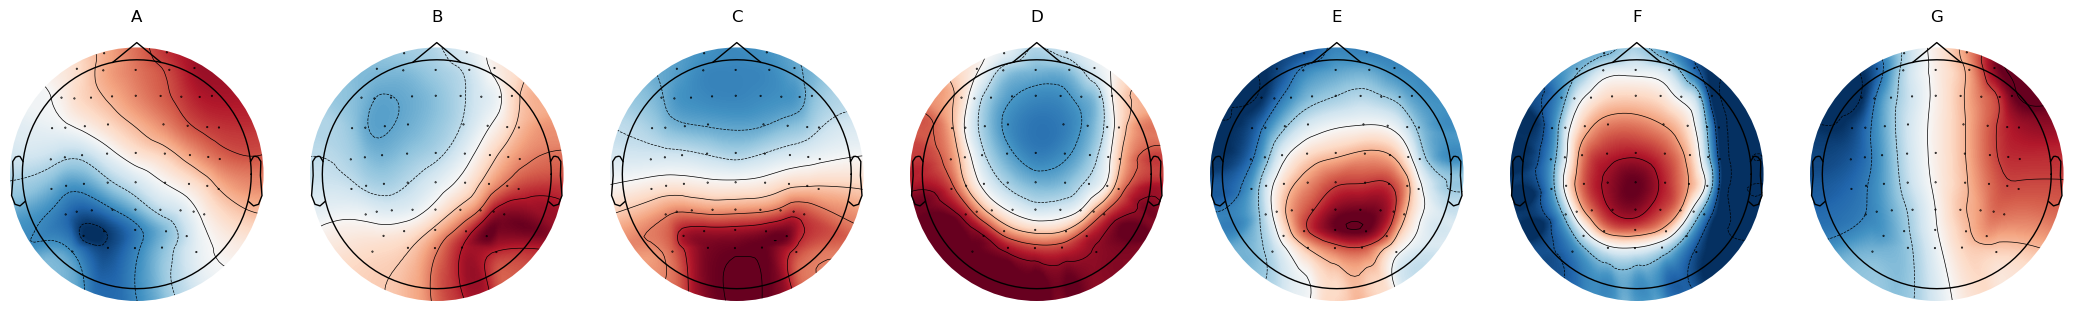



Processing file: H:\CSIC\Microstates\m8_2500.pickle
Number of clusters in computation: 8


Method,ModKMeans
Fit,100 initializations on 1704 samples
Cluster centers,8
GEV,75.35 %
Cluster centers names,"A, B, C, D, E, F, G, H"
Channels,61 EEG


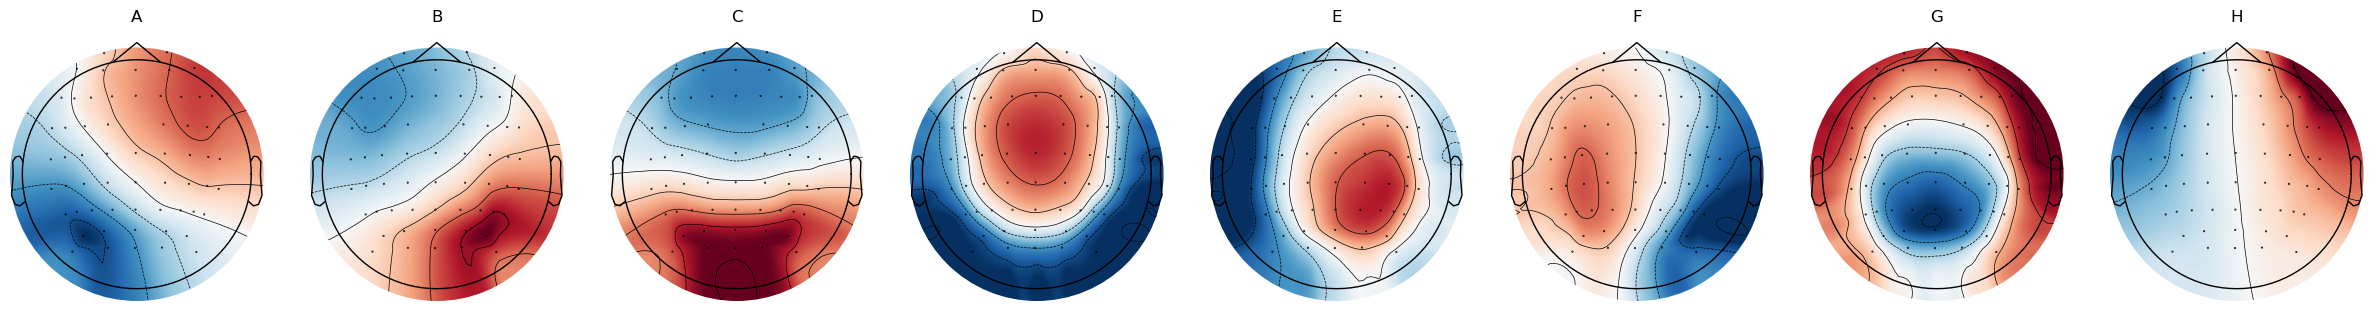



Processing file: H:\CSIC\Microstates\microstates.pickle
Number of clusters in computation: 3


Method,ModKMeans
Fit,100 initializations on 20 samples
Cluster centers,4
GEV,88.04 %
Cluster centers names,"A, B, C, D"
Channels,61 EEG


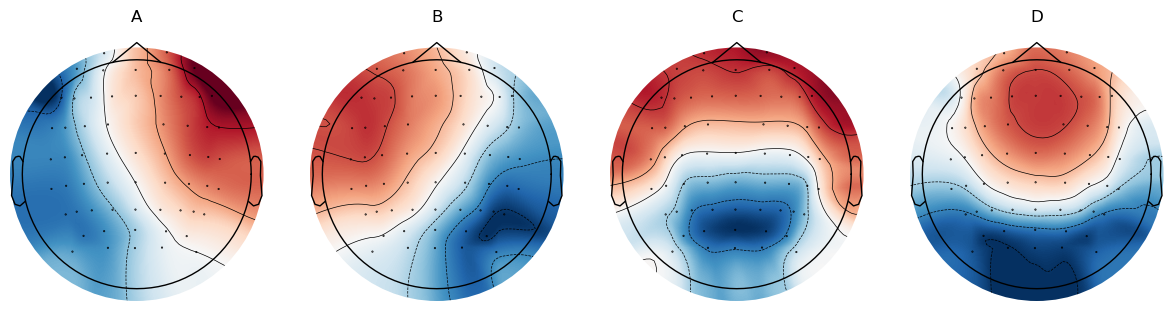

Error processing file H:\CSIC\Microstates\gev_results.json: invalid load key, '{'.


In [3]:
# Directory containing the files
directory = r"H:\CSIC\Microstates"

# Iterate over all files in the directory with enumeration
for idx, filename in enumerate(os.listdir(directory)):
    filepath = os.path.join(directory, filename)
    
    # Check if the path is a file (not a directory)
    if os.path.isfile(filepath):
        num_clusters = 3 + (idx % 6)  # This will cycle through 3 to 8
        u.process_file(filepath, num_clusters)

As the clustering that was wanted is not obtained, the one with 5 clusters is filtered, obtaining the following. 

In [5]:
# Open the pickle file
with open(r"H:\CSIC\Microstates\M.pickle", 'rb') as file:
    ModK = pickle.load(file)

In [6]:
ModK

Method,ModKMeans
Fit,100 initializations on 4 samples
Cluster centers,4
GEV,100.00 %
Cluster centers names,"A, B, C, D"
Channels,61 EEG


It is needed to be mentioned that the Global Explained Variance (GEV) seen above is not correct corresponding with the lemon dataset.

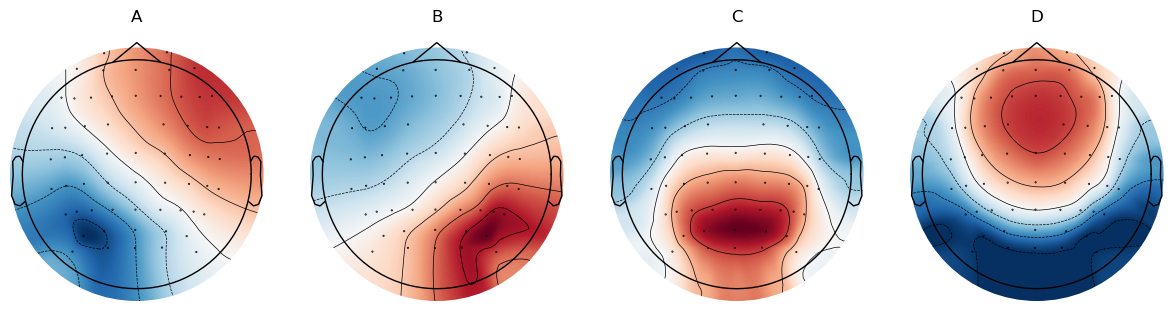

In [7]:
ModK.plot()
plt.show()

## Computing Global Explained Variance (GEV)

In [10]:
# Path to the microstate file
file_path = r"H:\CSIC\Microstates\Microstates.pickle"

# Define the path to the main data folder where the raw EEG can be found
DATA_FOLDER = r'E:\DATA_FOLDER'

In [11]:
# Super dictionary to store the GEV results for each subject
gev_results = {}

# Recording time for the preprocessing
t = time.time()

# Loop through subject folders in the data folder
for subject in os.listdir(DATA_FOLDER):
    print(f"\nProcessing data for subject: {subject}")

    # Construct the full path to the subject folder
    subject_path = os.path.join(DATA_FOLDER, subject)

    # Check if it's a directory
    if os.path.isdir(subject_path):
        # Construct the path to the RSEEG folder
        rseeg_folder = os.path.join(subject_path, 'RSEEG')
        
        # Check if the RSEEG folder exists
        if os.path.exists(rseeg_folder):
            # Find the .vhdr file
            vhdr_files = [file for file in os.listdir(rseeg_folder) if file.endswith('.vhdr')]
            
            # Check if a .vhdr file was found
            if vhdr_files:
                # Construct the full path to the .vhdr file
                vhdr_path = os.path.join(rseeg_folder, vhdr_files[0])
                
                try:
                    # Read the BrainVision file into a raw MNE object
                    raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto')
                    #raw.set_montage("standard_1020")
                    
                    # Preprocess the raw data using your custom preprocessing function
                    eeg = u.preprocessing(raw)  # Replace with your actual preprocessing function
                    
                    # Segment the preprocessed data using the ModKmeans object
                    segmentation = ModK.predict(eeg)
                    
                    # Compute the GEV and other parameters
                    gev_metrics = segmentation.compute_parameters()
                    print(gev_metrics)
                    
                    # Extract the GEV for each microstate
                    subject_gev = {
                        'A_gev': gev_metrics['A_gev'],
                        'B_gev': gev_metrics['B_gev'],
                        'C_gev': gev_metrics['C_gev'],
                        'D_gev': gev_metrics['D_gev']
                    }
                    
                    # Store the GEV values in the super dictionary with the subject as the key
                    gev_results[subject] = subject_gev
                
                except Exception as e:
                    print(f"Error processing subject {subject}: {e}")

# Print the total time taken for the preprocessing
print(f"\nTotal preprocessing time: {time.time() - t:.2f} seconds")

# Define the path where you want to save the JSON file
json_file_path = 'H:/CSIC/Microstates/gev_results.json'

# Save the GEV results to a JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(gev_results, json_file, indent=4)


Processing data for subject: sub-010002
{'A_mean_corr': 0.65794072843585, 'A_gev': 0.180240582450766, 'A_occurrences': 19.58924043845456, 'A_timecov': 0.32467336262521657, 'A_meandurs': 0.016574065934065935, 'B_mean_corr': 0.6542542511857785, 'B_gev': 0.16189720646902192, 'B_occurrences': 19.54423019568888, 'B_timecov': 0.2994155713521938, 'B_meandurs': 0.015319895864624011, 'C_mean_corr': 0.6521072338307525, 'C_gev': 0.09157308218966867, 'C_occurrences': 16.346545992248846, 'C_timecov': 0.20086270936612272, 'C_meandurs': 0.012287776846641923, 'D_mean_corr': 0.632276904558938, 'D_gev': 0.07218612888938972, 'D_occurrences': 14.677253075765154, 'D_timecov': 0.17504835665646695, 'D_meandurs': 0.011926506666666668, 'unlabeled': 1.0176125244618395e-05}

Processing data for subject: sub-010003
{'A_mean_corr': 0.6927516397326089, 'A_gev': 0.18294267026204517, 'A_occurrences': 15.163613043326423, 'A_timecov': 0.3122517707417273, 'A_meandurs': 0.020592174823344675, 'B_mean_corr': 0.69052369911

C:\Users\enriq\AppData\Local\Temp\ipykernel_44044\1360718712.py:31: RuntimeWarning: Omitted 313 annotation(s) that were outside data range.
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto')


{'A_mean_corr': 0.6337766593845068, 'A_gev': 0.2570797410749588, 'A_occurrences': 12.897789009252246, 'A_timecov': 0.38450228013565574, 'A_meandurs': 0.02981148783406462, 'B_mean_corr': 0.5805495154683488, 'B_gev': 0.06572539883816368, 'B_occurrences': 12.555665766685324, 'B_timecov': 0.22325265055480556, 'B_meandurs': 0.01778102847777095, 'C_mean_corr': 0.5959995049955836, 'C_gev': 0.035841256391782664, 'C_occurrences': 9.165301603503341, 'C_timecov': 0.16222506667544698, 'C_meandurs': 0.017699915801291047, 'D_mean_corr': 0.6374741825939941, 'D_gev': 0.0679320951933533, 'D_occurrences': 10.716431793487207, 'D_timecov': 0.23002000263409172, 'D_meandurs': 0.0214642342774844, 'unlabeled': 0.0006139013171628093}

Processing data for subject: sub-010016
{'A_mean_corr': 0.6280846276973833, 'A_gev': 0.0960823031389819, 'A_occurrences': 12.83575855895553, 'A_timecov': 0.22502886733074076, 'A_meandurs': 0.017531403874353632, 'B_mean_corr': 0.6516685916924905, 'B_gev': 0.12357274995460353, 'B_o

C:\Users\enriq\AppData\Local\Temp\ipykernel_44044\1360718712.py:31: RuntimeWarning: Omitted 170 annotation(s) that were outside data range.
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto')


{'A_mean_corr': 0.5747860398690277, 'A_gev': 0.13800927943336766, 'A_occurrences': 16.34789689828611, 'A_timecov': 0.4703502533605546, 'A_meandurs': 0.02877130044843049, 'B_mean_corr': 0.39122372462027327, 'B_gev': 0.015862570270637456, 'B_occurrences': 14.772355265289484, 'B_timecov': 0.12873917731489248, 'B_meandurs': 0.00871487146111292, 'C_mean_corr': 0.18102349305558724, 'C_gev': 0.010829501750650398, 'C_occurrences': 1.889207816224786, 'C_timecov': 0.010207971495555555, 'C_meandurs': 0.005403307888040713, 'D_mean_corr': 0.5676707463854457, 'D_gev': 0.0886701005063068, 'D_occurrences': 16.82260242462758, 'D_timecov': 0.39070259782899736, 'D_meandurs': 0.023224860694384914, 'unlabeled': 9.614279897646376e-07}

Processing data for subject: sub-010104
{'A_mean_corr': 0.6434289265081745, 'A_gev': 0.1591443345175511, 'A_occurrences': 18.651544738140196, 'A_timecov': 0.2970256336911585, 'A_meandurs': 0.015924988405050248, 'B_mean_corr': 0.6404582057438466, 'B_gev': 0.13673254287606998, 

C:\Users\enriq\AppData\Local\Temp\ipykernel_44044\1360718712.py:31: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto')


{'A_mean_corr': 0.6444554198896238, 'A_gev': 0.11176556757308169, 'A_occurrences': 12.016978168472441, 'A_timecov': 0.2380321661478681, 'A_meandurs': 0.019807988565075835, 'B_mean_corr': 0.6781560518843782, 'B_gev': 0.16197047955790048, 'B_occurrences': 12.525597986132714, 'B_timecov': 0.2740420675347875, 'B_meandurs': 0.02187856163339936, 'C_mean_corr': 0.6705604794292966, 'C_gev': 0.1299110872344869, 'C_occurrences': 11.414841010979698, 'C_timecov': 0.2379176551195018, 'C_meandurs': 0.020842835646213014, 'D_mean_corr': 0.6634521239856854, 'D_gev': 0.1365095944164695, 'D_occurrences': 11.465416715174811, 'D_timecov': 0.2500081111978426, 'D_meandurs': 0.021805409904286314, 'unlabeled': 2.4810107256002136e-05}

Processing data for subject: sub-010218
{'A_mean_corr': 0.6839035801889957, 'A_gev': 0.11589173950320468, 'A_occurrences': 12.590111573704041, 'A_timecov': 0.2247277907726367, 'A_meandurs': 0.017849547198772065, 'B_mean_corr': 0.6901492179336367, 'B_gev': 0.10975703119417872, 'B_

In [30]:
# Define the path to the JSON file
json_file_path = 'H:/CSIC/Microstates/gev_results.json'

# Load the GEV results from the JSON file
with open(json_file_path, 'r') as json_file:
    gev_results = json.load(json_file)

# Initialize a list to store the sum of GEV results for each patient
sums = []
patients = []

# Iterate over each patient's results in the dictionary
for patient, results in gev_results.items():
    patient_sum = 0
    for microstate, gev in results.items():
        # Compute the sum of the GEV results for this patient
        patient_sum += gev

    if patient_sum >= 0.53:
        sums.append(patient_sum)
        patients.append(patients)
    

# Compute the mean of the sums across all patients
mean_sum = np.mean(sums)

#print(f"Sum of GEV results for each patient: {sums}")
print(f"Mean of these sums across all patients: {mean_sum}")

Mean of these sums across all patients: 0.6011359827646976


In [31]:
len(sums)

106

In [19]:
# Print or save the GEV results for all subjects
print("\nGlobal Explained Variance (GEV) Results for each subject:")
for subject, gev in zip(list(gev_results.keys()), sums):
    print(f"{subject}: {gev}")


Global Explained Variance (GEV) Results for each subject:
sub-010002: 0.5058969999988463
sub-010003: 0.6166128584957646
sub-010004: 0.5458456705213919
sub-010005: 0.6551926068817205
sub-010006: 0.446418976864338
sub-010007: 0.5944856010735751
sub-010010: 0.5769750734823247
sub-010012: 0.6493672131155727
sub-010015: 0.42657849149825844
sub-010016: 0.5160834199230468
sub-010017: 0.5693064540795769
sub-010019: 0.5559233513559929
sub-010020: 0.39087661064270685
sub-010021: 0.45619377988120124
sub-010022: 0.47986105729172984
sub-010023: 0.5842890220530514
sub-010024: 0.7094888836858582
sub-010027: 0.5980767574307793
sub-010028: 0.6007010973423279
sub-010029: 0.4317004437275187
sub-010030: 0.6435868223212525
sub-010031: 0.585540273469142
sub-010032: 0.4927168052157523
sub-010033: 0.580992012425106
sub-010034: 0.5493296347484429
sub-010035: 0.6346600459874492
sub-010036: 0.37271025707750716
sub-010037: 0.44989794521909604
sub-010038: 0.6194650379690453
sub-010039: 0.48535120420381644
sub-010